# Breast Cancer Wisconsin Diagnostic - Shubham Jindal (100843466)

In this exercise we have a dataset for classifying Breast Cancer as Malignant (M) or Benign (B) based on number of given parameters.

We will be preparing classification models for the given data to compare the accuracies and find out the best fit. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)
import math
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

Reading data from given csv file

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = df.columns.str.strip()

In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,...,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


The only target variable in the data is the 'diagnosis' and remaining are features

Removing 'id' column from the data as it has no significance

In [6]:
df = df.drop(['id'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


The data consists of 31 features and 569 samples

Let's now check on the null values

In [7]:
df.isnull().sum()

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

We see that there are no Null or empty values in the dataset, so there is no requirement of clearing null records

Checking for duplicate rows and removing if any

In [8]:
df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)
print('Original shape - ',df.shape)
print('Shape after removing duplicates - ',df1.shape)

Original shape -  (569, 31)
Shape after removing duplicates -  (569, 31)


The above shows that there are no duplicate rows in the data

## EDA - Exploratory Data Analysis

Lets check the stats of all the columns

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We observe that the data has so many numerical columns and all the columns have their own scale of measurement

Lets see the number of Malignant (M) and Benign (B) observervations been made from 569 cancer biopsies 

                                Visualising Target Distribution:                                


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

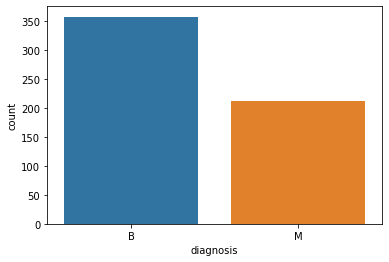

In [10]:
print('\033[1mVisualising Target Distribution:'.center(100))
sns.countplot(df['diagnosis'], label = 'count')

In [11]:
df_count = pd.DataFrame(df['diagnosis'].value_counts()).reset_index()
df_count.rename(columns={'index': 'Diagnosis', 'diagnosis': 'Count'}, inplace=True)
fig = px.bar(df_count,x='Diagnosis', y='Count',
             title="Count of each diagnosis type from dataset")
fig.show()

In [12]:
fig = px.pie(df_count, values='Count', names='Diagnosis', title='Count relation')
fig.show()

Let us visualize distribution of mean for belign and malignant tumors

In [13]:
M = df[(df['diagnosis'] == 'M')]
B = df[(df['diagnosis'] == 'B')]
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    group_labels = ['malignant', 'benign']
    colors = ['#FFD700', '#7EC0EE']
    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    fig['layout'].update(title = data_select)
    py.iplot(fig, filename = 'Density plot')
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)

From above charts we can see the distribution of data around different features based on target variable. We can observe both B and M intersect in areas. 
<br>For most of the features mean of benign tumors are bigger than mean of malignant tumors. 
<br>Distribution for benign tumors is approximately bell shaped. 

Lets now visualize distribution of features based on diagnosis

radius distribution based on diagnosis


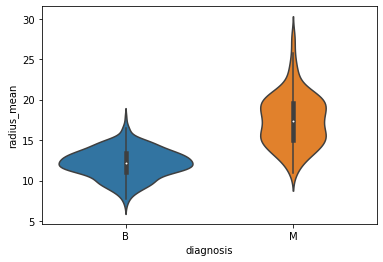

texture distribution based on diagnosis


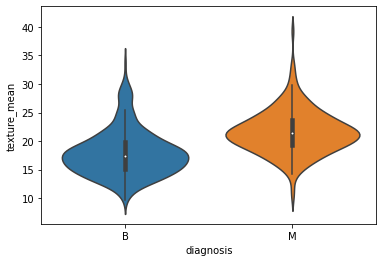

perimeter distribution based on diagnosis


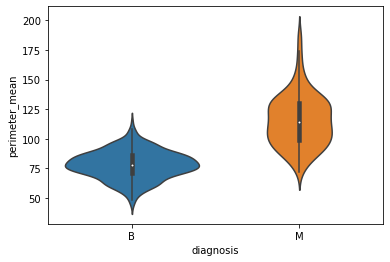

area distribution based on diagnosis


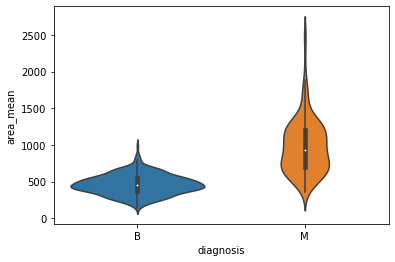

smoothness distribution based on diagnosis


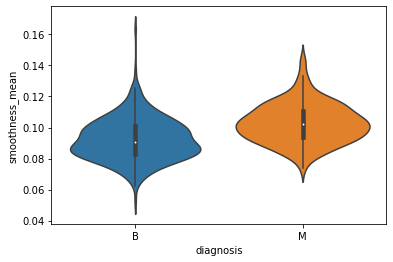

compactness distribution based on diagnosis


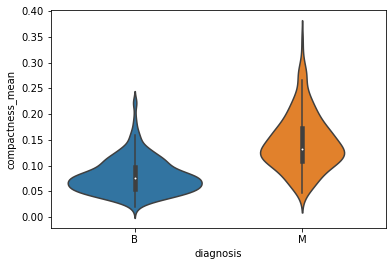

concavity distribution based on diagnosis


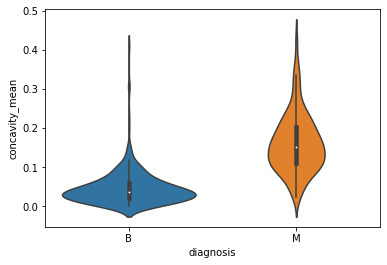

points distribution based on diagnosis


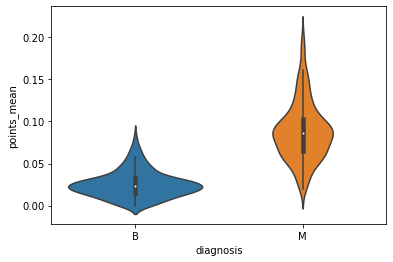

symmetry distribution based on diagnosis


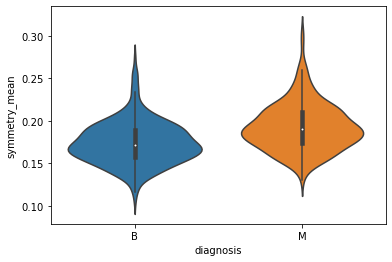

dimension distribution based on diagnosis


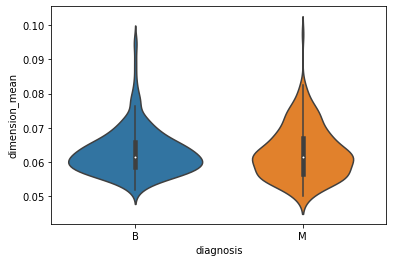

In [14]:
features = ['radius','texture','perimeter','area','smoothness','compactness','concavity','points','symmetry','dimension']
for feature in features:
    print("{} distribution based on diagnosis".format(feature))
    sns.violinplot(data=df, x="diagnosis", y="{}_mean".format(feature), size=8)
    plt.show()

The above charts helps to understand the relationships of the features with diagnosis.
<br>Also, we can see that most outliers can be noticed in 'concavity' feature

We can observe from above charts that out 569 cancer biopsies, 357 are Benign (62.7%) and 212 are Malignant (37.3%)

                                          Features Distribution                                           


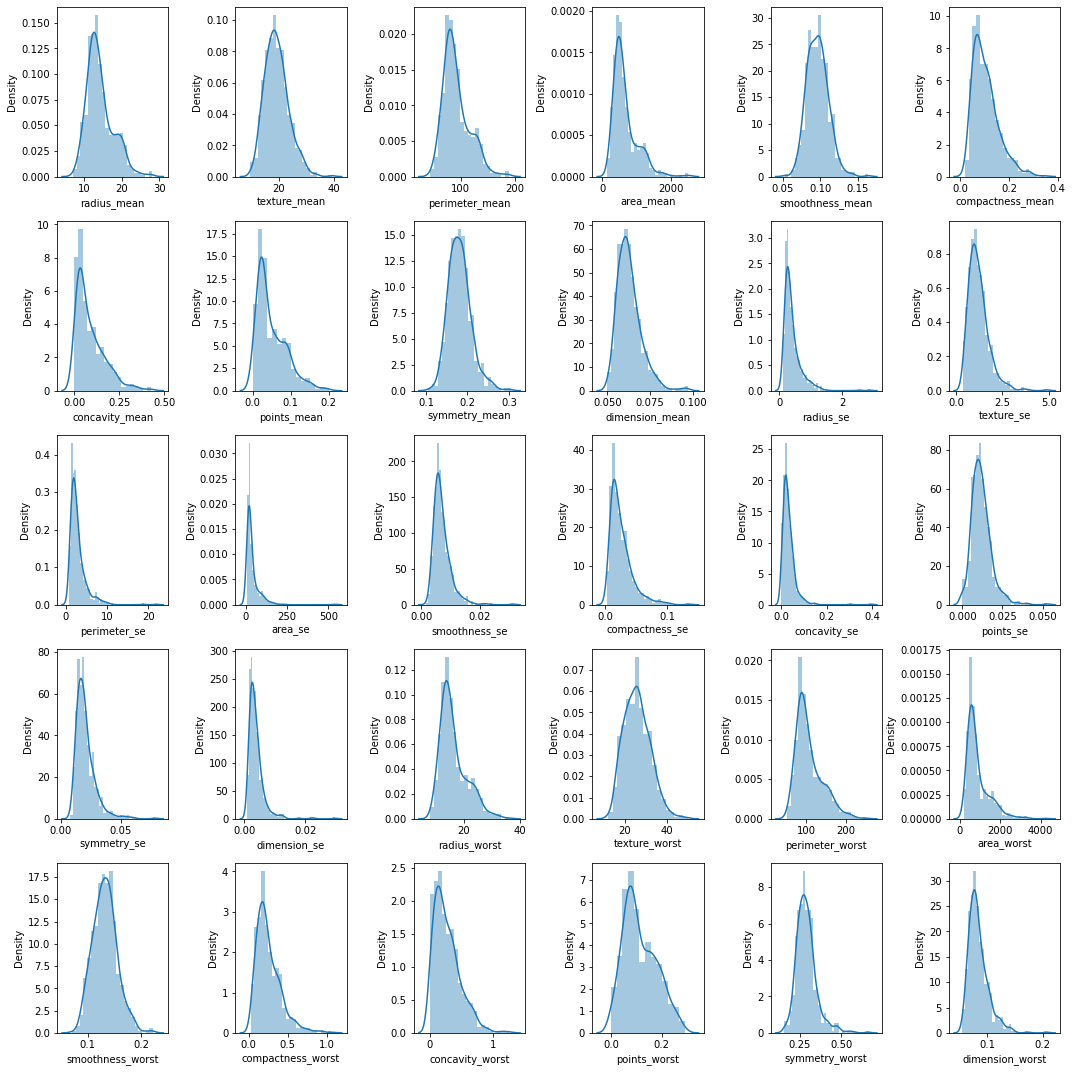

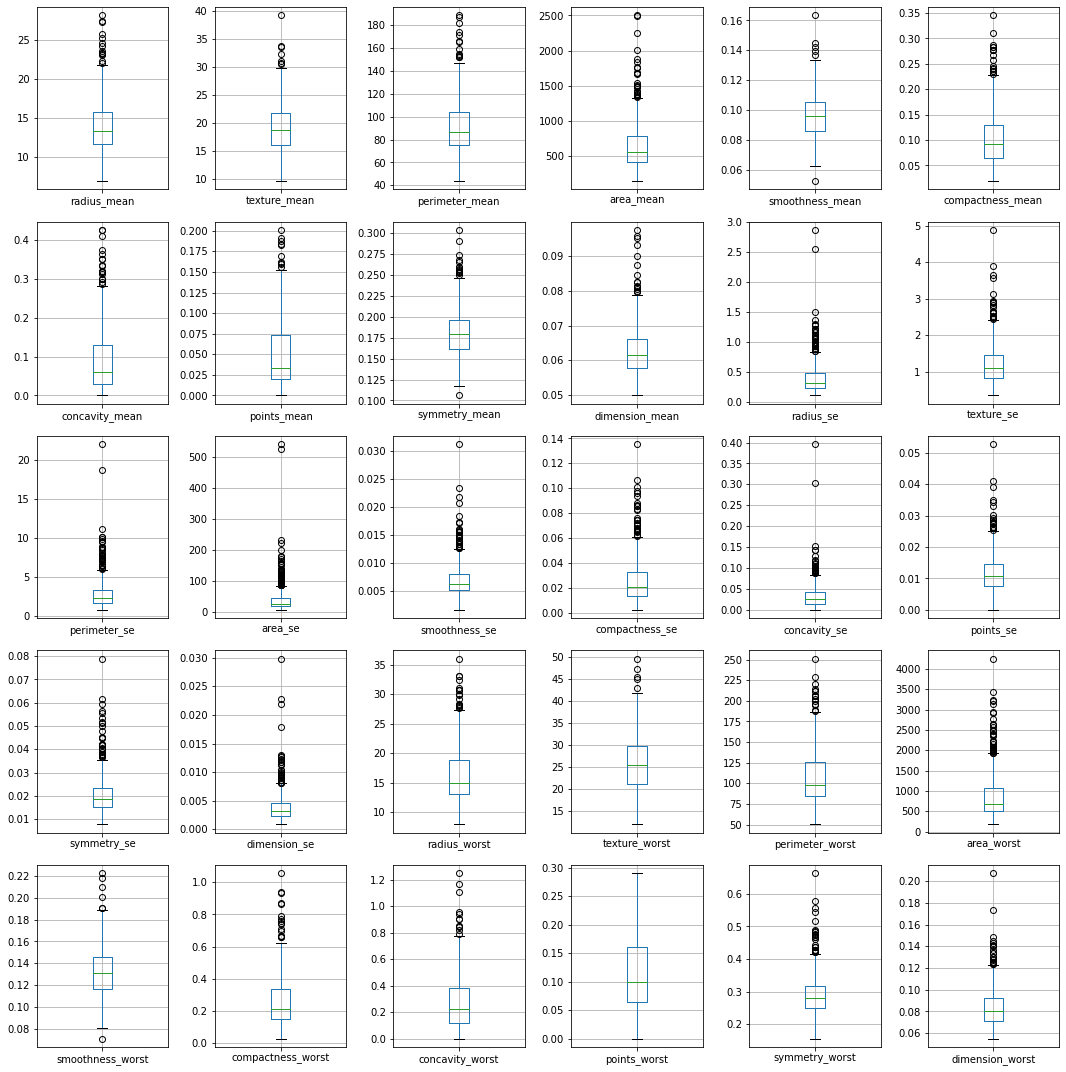

In [15]:
print('\033[1mFeatures Distribution'.center(110))
features = [i for i in df.columns.values if i not in ['diagnosis']]
n=6
nf = [i for i in features]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

The data seems to be somewhat normally distributed. But there are many outliers in the data that needs to be managed before model training.

Now let us see the relationship between the mean features in the dataset

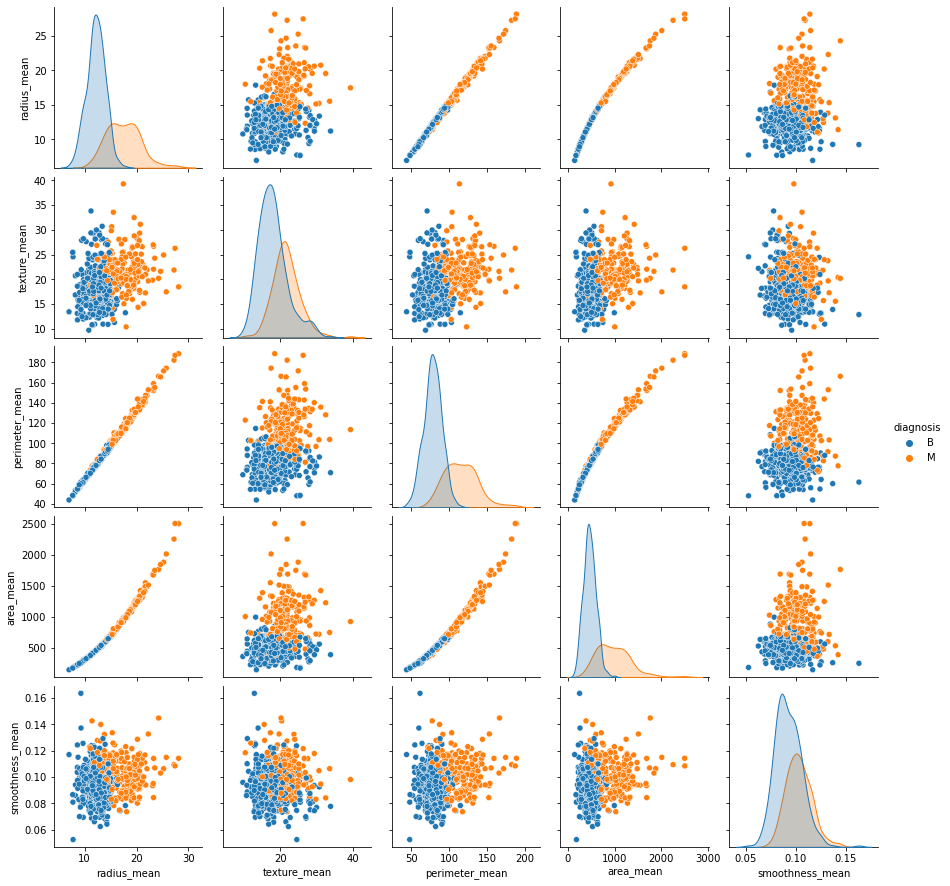

In [16]:
sns.pairplot(df.iloc[: ,0:6], hue = 'diagnosis')

There seems that the data have many overlaps for the outcome classes making it difficult to be distinguishable. All these irregularities needs to be removed by outliear removal and data cleaning.

## Feature Engineering and Selection

Converting the target variable from Categorical to Numerical

For this purpose we can either using encoding (like Label Encoding) or normal map function. I am using map function as there are only 2 categories

In [17]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,0,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,1,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,0,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,...,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,0,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


Lets remove the outliers from the data

In [18]:
original_df = df.copy()
for i in [i for i in df.columns]:
    if df[i].nunique()>=12:
        Q1 = df[i].quantile(0.15)
        Q3 = df[i].quantile(0.85)
        IQR = Q3 - Q1
        df = df[df[i] <= (Q3+(1.5*IQR))]
        df = df[df[i] >= (Q1-(1.5*IQR))]
df = df.reset_index(drop=True)
display(df.head())
print('Before removal of outliers, The dataset had {} samples.'.format(original_df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


Before removal of outliers, The dataset had 569 samples.
After removal of outliers, The dataset now has 502 samples.


In [19]:
print(df['diagnosis'].value_counts())

0    337
1    165
Name: diagnosis, dtype: int64


As we see there is an imbalance between the target variable and this might affect with our model training. This needs to be fixed before model building. 

I am using SMOTE technique, which is an oversampling method to to solve the imbalance problem. 

Separating data into label variables and target variable

In [20]:
columns = df.columns
X = df.drop(['diagnosis'], axis=1)
Y = df['diagnosis']

In [21]:
print('Original distribution:')
print(df['diagnosis'].value_counts())
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)
df = pd.DataFrame(X, columns=columns)
df['diagnosis'] = Y
print('Distribution after applying SMOTE technique:')
print(df['diagnosis'].value_counts())

Original distribution:
0    337
1    165
Name: diagnosis, dtype: int64
Distribution after applying SMOTE technique:
0    337
1    337
Name: diagnosis, dtype: int64


As we can see we have successfully elimintated imbalance from the dataset using SMOTE technique. The new dataset has 674 samples and 31 columns. 

Splitting the dataset into test and train data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Now we will need to apply feature scaling as there are so many numerical variables with varying degrees of magnitude, range and units, which might hinder with our data modeling. So we will scale the data where the data would be around the mean with a unit standard deviation. 

In [23]:
std = StandardScaler()
print('Normalization on training set: ')
X_train_std = std.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
display(X_train_std.describe())
print('Normalization on testing test: ')
X_test_std = std.fit_transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)
display(X_test_std.describe())

Normalization on training set: 


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,...,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02
mean,1.477940e-16,6.465694e-16,9.414503e-16,3.644172e-16,4.749680e-16,1.810300e-16,3.347169e-16,1.461440e-17,6.628338e-16,-1.126222e-15,...,1.565155e-16,1.402511e-16,4.525750e-17,-2.036587e-16,7.217628e-16,-1.579298e-17,-7.095056e-17,1.452011e-16,-7.684346e-17,-4.009532e-16
std,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,...,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00
min,-2.176468e+00,-2.220339e+00,-2.171781e+00,-1.721178e+00,-3.498907e+00,-1.939319e+00,-1.402273e+00,-1.543384e+00,-2.655441e+00,-2.139598e+00,...,-1.889040e+00,-2.393190e+00,-1.908257e+00,-1.464534e+00,-2.519103e+00,-1.638167e+00,-1.593278e+00,-2.007368e+00,-2.407061e+00,-1.849831e+00
25%,-7.260811e-01,-6.992808e-01,-7.576569e-01,-7.584900e-01,-7.404453e-01,-8.193330e-01,-8.705890e-01,-8.722418e-01,-7.194051e-01,-8.172619e-01,...,-8.193353e-01,-7.560235e-01,-8.229757e-01,-8.056646e-01,-6.941216e-01,-7.411727e-01,-8.298998e-01,-8.096413e-01,-6.879432e-01,-7.361187e-01
50%,-1.883217e-01,-7.663089e-03,-1.895025e-01,-2.789475e-01,6.348085e-02,-5.937664e-02,-9.722844e-02,-9.775677e-02,-6.345736e-03,-9.904219e-02,...,-1.744864e-01,-3.869066e-02,-1.581128e-01,-2.825074e-01,7.252898e-03,-1.838548e-01,-1.635454e-02,-2.464457e-02,-1.256716e-01,-1.791707e-01
75%,7.949651e-01,6.075004e-01,7.890114e-01,7.612077e-01,6.625023e-01,6.400154e-01,7.321430e-01,8.298776e-01,6.340333e-01,6.674043e-01,...,7.619383e-01,7.454005e-01,7.514150e-01,6.961529e-01,6.734414e-01,6.148575e-01,6.343084e-01,8.568036e-01,5.708587e-01,5.489446e-01
max,3.070861e+00,3.540637e+00,3.142590e+00,3.631691e+00,2.887489e+00,4.085540e+00,3.539294e+00,3.029459e+00,4.201041e+00,3.076290e+00,...,2.758945e+00,3.964987e+00,2.944067e+00,3.364951e+00,2.625092e+00,3.552400e+00,3.442397e+00,2.691282e+00,3.673952e+00,3.324050e+00


Normalization on testing test: 


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,...,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02
mean,-4.687001e-16,-5.231174e-16,4.419016e-16,4.295962e-16,1.483761e-15,-3.018248e-16,9.844342e-18,3.007993e-17,-1.232730e-15,-2.130753e-15,...,2.909550e-16,-5.522402e-16,-1.792918e-16,-2.302482e-16,4.566681e-16,-2.280606e-16,2.734539e-18,-1.482120e-16,1.996214e-16,1.024632e-15
std,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,...,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00
min,-2.290589e+00,-2.391954e+00,-2.254538e+00,-1.694768e+00,-2.418458e+00,-1.729157e+00,-1.372901e+00,-1.484299e+00,-2.864717e+00,-2.044630e+00,...,-1.980481e+00,-2.376790e+00,-1.975954e+00,-1.473701e+00,-2.334835e+00,-1.637377e+00,-1.615924e+00,-2.025966e+00,-2.347307e+00,-1.640439e+00
25%,-7.385568e-01,-7.132019e-01,-7.597451e-01,-7.406909e-01,-7.219319e-01,-7.647252e-01,-8.296851e-01,-8.293462e-01,-7.051234e-01,-7.566145e-01,...,-7.727898e-01,-7.967899e-01,-7.912144e-01,-7.611024e-01,-6.111403e-01,-7.597341e-01,-8.266644e-01,-8.370206e-01,-7.117997e-01,-6.988584e-01
50%,-2.231051e-01,-8.289860e-02,-1.870271e-01,-2.922957e-01,-2.638901e-02,-3.954349e-02,-1.882008e-01,-2.881765e-01,1.179985e-02,-1.063543e-01,...,-2.167999e-01,-7.111671e-02,-2.067130e-01,-3.125080e-01,9.502653e-03,-2.044399e-01,-1.042764e-01,4.158703e-03,4.348047e-02,-1.809383e-01
75%,7.136724e-01,6.002426e-01,7.014322e-01,6.236960e-01,6.949813e-01,5.933298e-01,7.354601e-01,8.333802e-01,6.393436e-01,6.046668e-01,...,7.456539e-01,7.111704e-01,7.209466e-01,6.679482e-01,6.489530e-01,6.220826e-01,6.328702e-01,7.806693e-01,5.964574e-01,5.312440e-01
max,3.159453e+00,3.149511e+00,3.320812e+00,3.608378e+00,3.184790e+00,3.737348e+00,3.840962e+00,3.686380e+00,2.451545e+00,3.193180e+00,...,2.843726e+00,3.435125e+00,3.203949e+00,3.130008e+00,2.506180e+00,3.095616e+00,2.818992e+00,2.626606e+00,3.125837e+00,3.088073e+00


We have successfully manipulated the data and now it is fit for model training

We now have to perform Feature selection

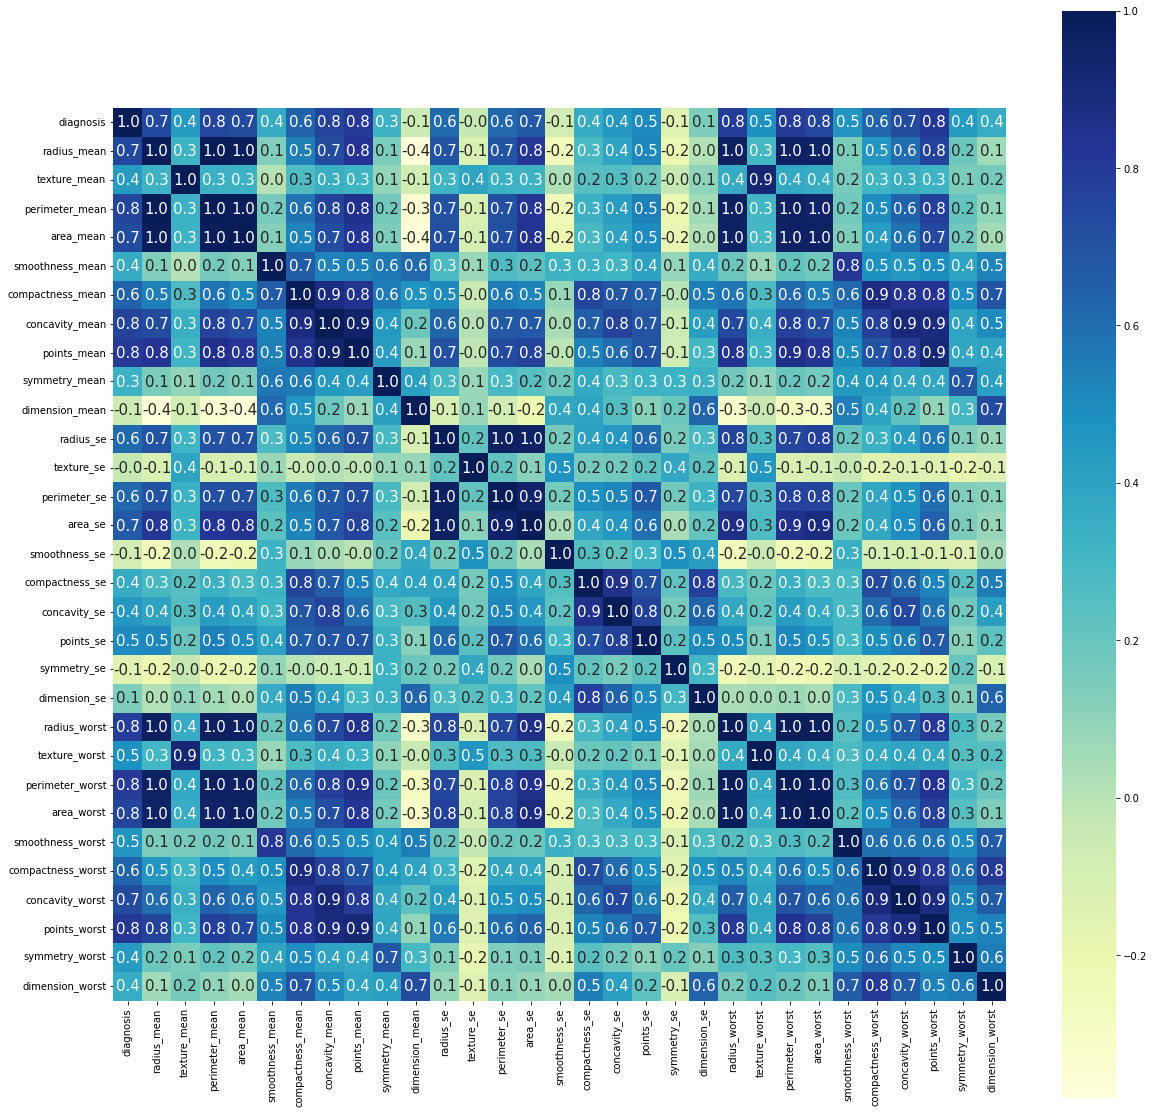

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')
plt.show()

From above correlation chart we observe that there is strong multi-collinearity in the dataset

We would need to use a technique to perform Feature Selection/Extraction in order to take care of these multi-collinearity

I'll be using Recursive Feature Elimination (RFE) with cross-validation for this task

Optimal number of features : 13


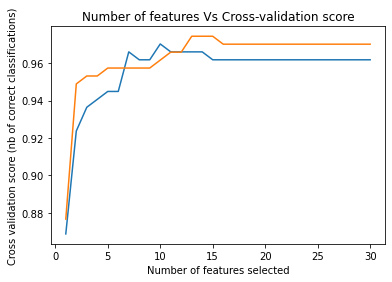

In [25]:
svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title("Number of features Vs Cross-validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [26]:
Features = list(X_train.columns[rfecv.support_])
print('Best features :', Features)

Best features : ['radius_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean', 'symmetry_mean', 'radius_se', 'concavity_se', 'radius_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'points_worst']


By using Recursive Feature Elimination we have received our most optimal feature variables. We will continue with model building with only these features

In [27]:
X_train = X_train_std[Features]
X_test = X_test_std[Features]

Lets see the correlation matrix only for the choosen features

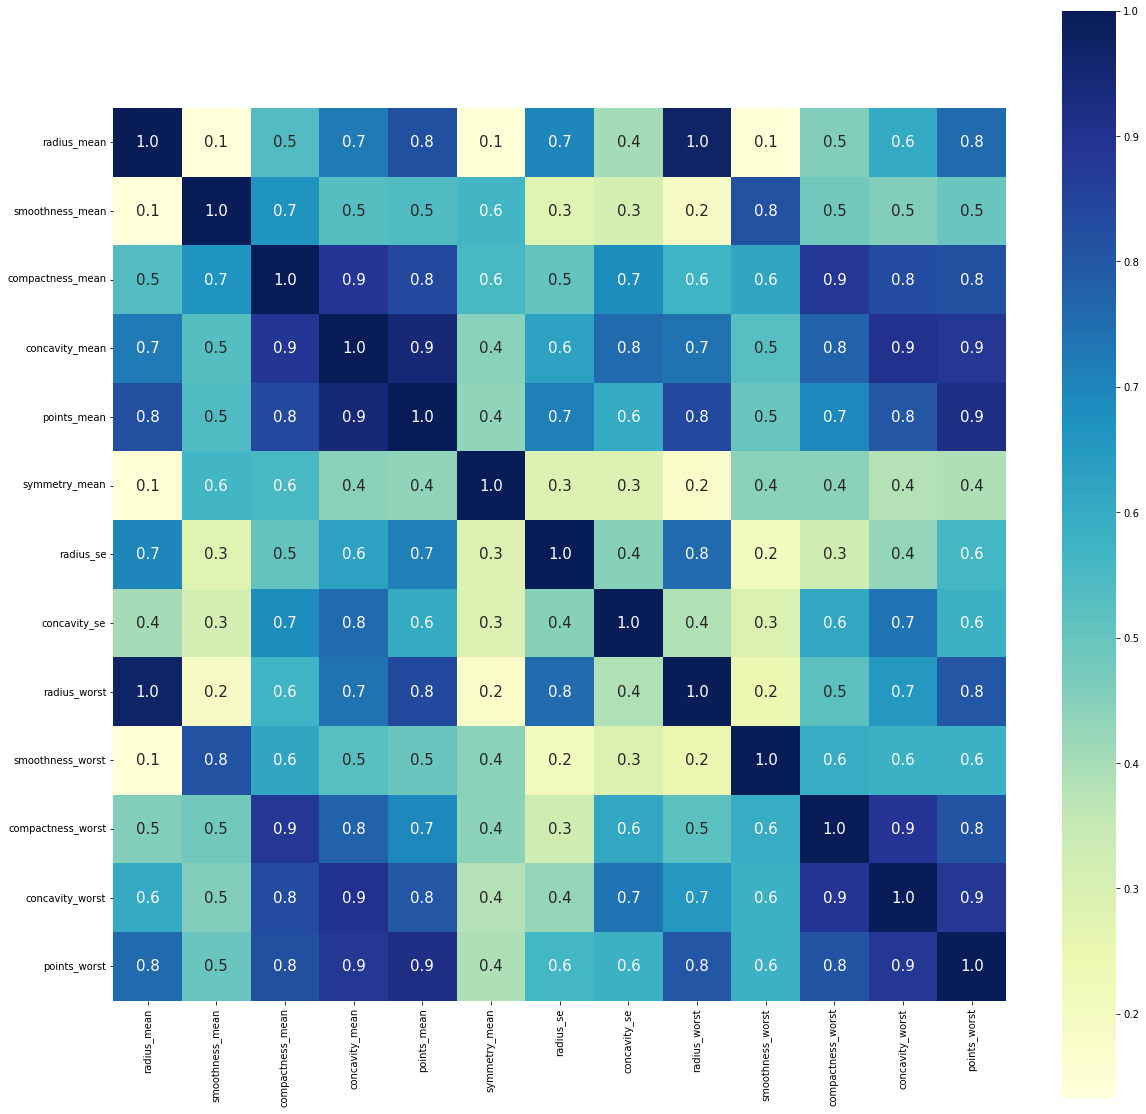

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df[Features].corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')
plt.show()

## Data Modeling

For this exercise we will be building up different Classification models and we will be comparing the accuracy to find the best fit model for this exercise

### 1. Decision Tree

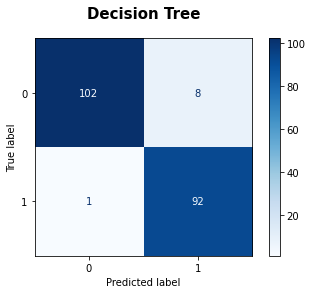

Accuracy -  0.9556650246305419

               precision    recall  f1-score   support

           0       0.99      0.93      0.96       110
           1       0.92      0.99      0.95        93

    accuracy                           0.96       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.96      0.96      0.96       203



In [29]:
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
Y_pred= dt_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_dt.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Decision Tree", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''

print('\n',classification_report(Y_test, Y_pred))

### 2. Random Forest

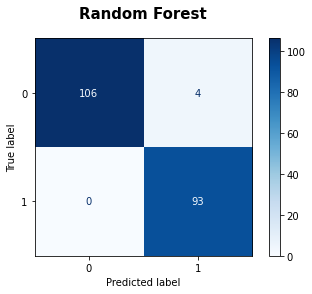

Accuracy -  0.9802955665024631

               precision    recall  f1-score   support

           0       1.00      0.96      0.98       110
           1       0.96      1.00      0.98        93

    accuracy                           0.98       203
   macro avg       0.98      0.98      0.98       203
weighted avg       0.98      0.98      0.98       203



In [30]:
rf_model= RandomForestClassifier()
rf_model.fit(X_train, Y_train)
Y_pred= rf_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_rf= ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_rf.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

### 3. KNN Model

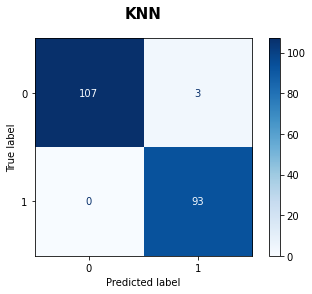

Accuracy -  0.9852216748768473

               precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.97      1.00      0.98        93

    accuracy                           0.99       203
   macro avg       0.98      0.99      0.99       203
weighted avg       0.99      0.99      0.99       203



In [31]:
knn_model= KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
Y_pred= knn_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

### 4. SVM

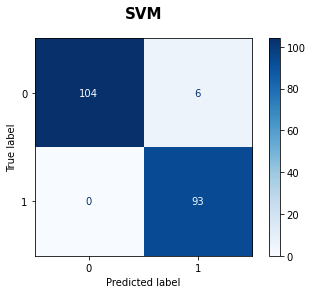

Accuracy -  0.9704433497536946

               precision    recall  f1-score   support

           0       1.00      0.95      0.97       110
           1       0.94      1.00      0.97        93

    accuracy                           0.97       203
   macro avg       0.97      0.97      0.97       203
weighted avg       0.97      0.97      0.97       203



In [32]:
svc_model= SVC()
svc_model.fit(X_train, Y_train)
Y_pred= svc_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_svm.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVM", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

### 5. Naive Bayes Classifier

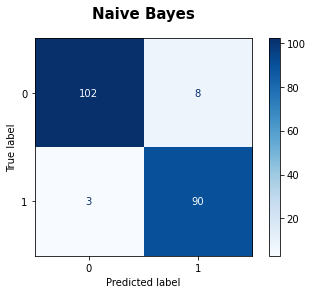

Accuracy -  0.9458128078817734

               precision    recall  f1-score   support

           0       0.97      0.93      0.95       110
           1       0.92      0.97      0.94        93

    accuracy                           0.95       203
   macro avg       0.94      0.95      0.95       203
weighted avg       0.95      0.95      0.95       203



In [33]:
nb_model = BernoulliNB()
nb_model.fit(X_train, Y_train)
Y_pred = nb_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_svm.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Naive Bayes", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

We have used 5 different classification models to train our model: Decision Tree, Random Forest, KNN, SVM, Naive Bayes. 

The accuracy of all the algorithms is pretty good (above 95), but we might choose the best algorithm in this exercise on the basis of recall score as it is disease prediction. The algorithms with highest recall score is SVM, Random Forest and KNN.

Now let us use Hyperparameter tuning for each model and see the results and compare with the previous results obtained

### 1. Decision Tree Hyperparameter tuning

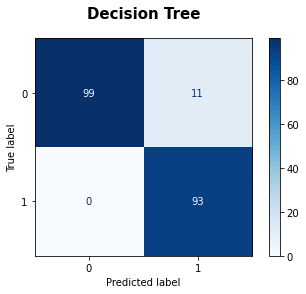

Accuracy -  0.9458128078817734

               precision    recall  f1-score   support

           0       1.00      0.90      0.95       110
           1       0.89      1.00      0.94        93

    accuracy                           0.95       203
   macro avg       0.95      0.95      0.95       203
weighted avg       0.95      0.95      0.95       203



In [34]:
dt_model = DecisionTreeClassifier()
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rcv = RandomizedSearchCV(dt_model, param_dist, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)
dt = rcv.fit(X_train, Y_train).best_estimator_
Y_pred = dt.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_svm.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Decision Tree", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

### 2. Random Forest Hyperparameter Tuning

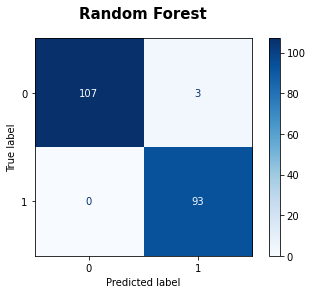

Accuracy -  0.9852216748768473

               precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.97      1.00      0.98        93

    accuracy                           0.99       203
   macro avg       0.98      0.99      0.99       203
weighted avg       0.99      0.99      0.99       203



In [35]:
rf_model= RandomForestClassifier()
param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rcv = RandomizedSearchCV(rf_model, param_dist, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)
rf = rcv.fit(X_train, Y_train).best_estimator_
Y_pred= rf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_rf= ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_rf.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

### 3. KNN Model Hyperparameter Tuning

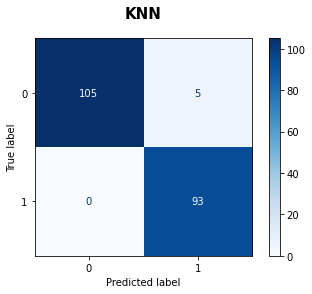

Accuracy -  0.9753694581280788

               precision    recall  f1-score   support

           0       1.00      0.95      0.98       110
           1       0.95      1.00      0.97        93

    accuracy                           0.98       203
   macro avg       0.97      0.98      0.98       203
weighted avg       0.98      0.98      0.98       203



In [36]:
knn_model= KNeighborsClassifier()
knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rcv = RandomizedSearchCV(knn_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
knn = rcv.fit(X_train, Y_train).best_estimator_
Y_pred= knn.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

### 4. SVM Hyperparameter Tuning

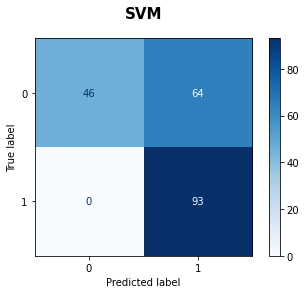

Accuracy -  0.6847290640394089

               precision    recall  f1-score   support

           0       1.00      0.42      0.59       110
           1       0.59      1.00      0.74        93

    accuracy                           0.68       203
   macro avg       0.80      0.71      0.67       203
weighted avg       0.81      0.68      0.66       203



In [37]:
svm_model= SVC(probability=True)
svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rcv = RandomizedSearchCV(svm_model, svm_param, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)
svm = rcv.fit(X_train, Y_train).best_estimator_
Y_pred= svm.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_svm.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVM", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

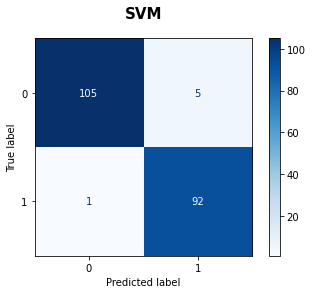

Accuracy -  0.9704433497536946

               precision    recall  f1-score   support

           0       0.99      0.95      0.97       110
           1       0.95      0.99      0.97        93

    accuracy                           0.97       203
   macro avg       0.97      0.97      0.97       203
weighted avg       0.97      0.97      0.97       203



In [38]:
svc_model= SVC(C= 0.5, gamma= 0.1, kernel= 'rbf')
svc_model.fit(X_train, Y_train)
Y_pred= svc_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_svm.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVM", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

### 5. Naive Bayes Hyperparameter Tuning

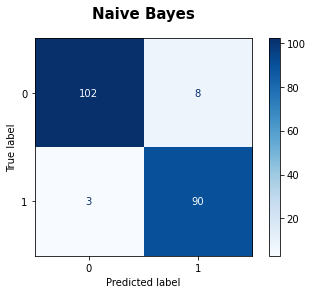

Accuracy -  0.9458128078817734

               precision    recall  f1-score   support

           0       0.97      0.93      0.95       110
           1       0.92      0.97      0.94        93

    accuracy                           0.95       203
   macro avg       0.94      0.95      0.95       203
weighted avg       0.95      0.95      0.95       203



In [39]:
nb_model = BernoulliNB()
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rcv = RandomizedSearchCV(nb_model, params, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)
nb = rcv.fit(X_train, Y_train).best_estimator_
Y_pred = nb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_svm.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Naive Bayes", pad= 20, fontsize= 15, fontweight= "bold")
plt.show()

print('Accuracy - ',accuracy_score(Y_test, Y_pred))
'''print('Precision - ',precision_score(Y_test, Y_pred))
print('Recall - ',recall_score(Y_test, Y_pred))
print('F1 score - ',f1_score(Y_test, Y_pred))'''
print('\n',classification_report(Y_test, Y_pred))

## Conclusion

The Dataset was quiet small totalling around 569 samples & after preprocessing around 7% of the datasamples were dropped.

The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to balance the classes, adding around 18% more samples to the dataset.

We saw the best models turned out to be SVM, Random Forest and KNN. But it is arguable that the models were overfitting the data as the accurracies were pretty high.

Even Hyperparameter Tuning was used on the models to increase the efficiency of the models but ther was hardly any change in the scores. 

It can be concluded from this exercise that not to use machine learning as the primary means of breast cancer detection. But even though we want to create such model, we need bigger dataset for creating a classifier model. 